In [135]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [136]:
df=pd.read_csv('titanic1.csv')
print(df)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

In [137]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [138]:
df.shape

(1309, 14)

In [139]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

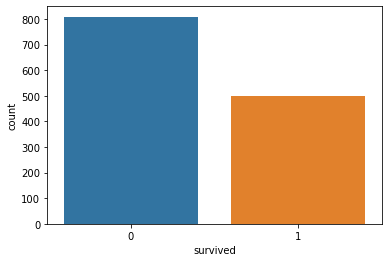

In [140]:
sn.countplot(x='survived',data=df)

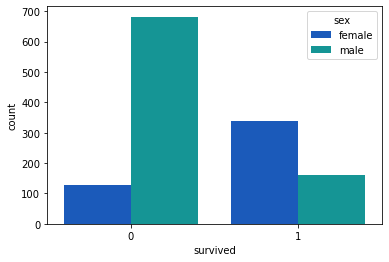

In [141]:
sn.countplot(x='survived',hue='sex',data=df,palette='winter')

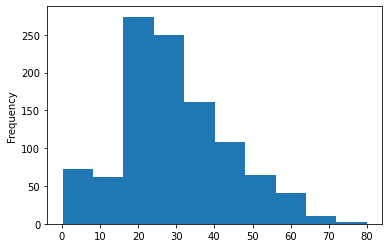

In [142]:
df['age'].plot.hist()

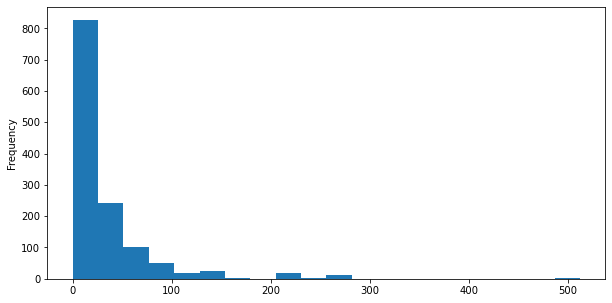

In [143]:
df['fare'].plot.hist(bins=20, figsize=(10,5))

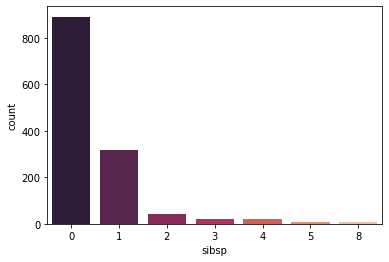

In [144]:
sn.countplot(x='sibsp',data=df,palette='rocket')

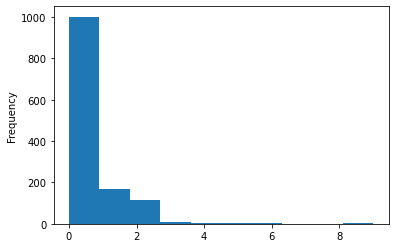

In [145]:
df['parch'].plot.hist()

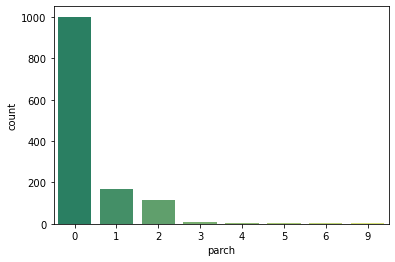

In [146]:
sn.countplot(x='parch', data=df,palette='summer')

In [147]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

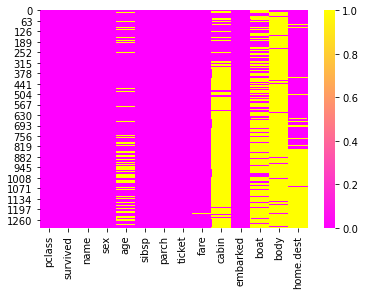

In [148]:
sn.heatmap(df.isnull(),cmap='spring')

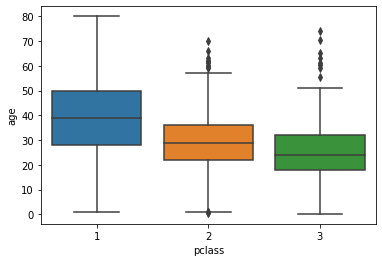

In [149]:
sn.boxplot(x='pclass',y='age',data=df)

In [150]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [151]:
#df.drop('cabin',axis=1)

In [152]:
#df.head(5)

In [153]:
#df.dropna(inplace=True)

In [154]:
pd.get_dummies(df['sex']).head(5)

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [155]:
sex=pd.get_dummies(df['sex'],drop_first=True)

In [156]:
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [157]:
embark=pd.get_dummies(df['embarked'])

In [158]:
embark.head(3)

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1


c stands for cherbourg,Q for Queenstown,S for Southhampton.
we can drop any one of the column as we can infer from the two columns itself

In [159]:
embark=pd.get_dummies(df['embarked'],drop_first=True)

In [160]:
embark.head(3)

,Q,S
0,0,1
1,0,1
2,0,1


In [161]:
Pc1=pd.get_dummies(df['pclass'],drop_first=True)
Pc1.head(3)

,2,3
0,0,0
1,0,0
2,0,0


In [162]:
df=pd.concat([df,sex,embark,Pc1],axis=1)

In [163]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,male,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,0


In [164]:
df.drop(['name','pclass','ticket','sex','embarked'],axis=1,inplace=True)

In [165]:
df.head(5)

,survived,age,sibsp,parch,fare,cabin,boat,body,home.dest,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,B5,2,NaN,"St Louis, MO",0,0,1,0,0
1,1,0.9167,1,2,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
2,0,2.0000,1,2,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,0
3,0,30.0000,1,2,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
4,0,25.0000,1,2,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,0


In [166]:
df.drop(['cabin','boat','body'],axis=1,inplace=True)

In [167]:
df.head(5)

,survived,age,sibsp,parch,fare,home.dest,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,"St Louis, MO",0,0,1,0,0
1,1,0.9167,1,2,151.5500,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
2,0,2.0000,1,2,151.5500,"Montreal, PQ / Chesterville, ON",0,0,1,0,0
3,0,30.0000,1,2,151.5500,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
4,0,25.0000,1,2,151.5500,"Montreal, PQ / Chesterville, ON",0,0,1,0,0


In [168]:
df.drop(['home.dest'],axis=1,inplace=True)

In [169]:
df.head(3)

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,0,0


In [170]:
df.isnull().values.any()

True

In [171]:
#Checking for null values
df.isnull().sum()

survived      0
age         263
sibsp         0
parch         0
fare          1
male          0
Q             0
S             0
2             0
3             0
dtype: int64

In [179]:
for col in['age','fare']:df[col].fillna(df[col].mode()[0],inplace=True)

In [180]:
df.isnull().values.any()

False

# Train the Model

In [181]:
x=df.drop('survived',axis=1)
y=df['survived']

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)

# Logistic Regression

In [184]:
from  sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [185]:
lm.fit(X_train,y_train)

LogisticRegression()

In [186]:
prediction=lm.predict(X_test)

In [187]:
from sklearn.metrics import classification_report

In [188]:
from sklearn.metrics import classification_report

In [190]:
from sklearn.metrics import confusion_matrix

In [193]:
confusion_matrix(y_test, prediction)

array([[224,  52],
       [ 44, 112]], dtype=int64)

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_test,prediction)

0.7777777777777778

We have the 77.77% accuracy